In [1]:
import sympy
from sympy import sin,cos
from math import pi
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as so

In [2]:
q1 = sympy.Symbol('\\theta_1')
q1

\theta_1

In [3]:
q2,q3,q4,q5 = sympy.symbols('\\theta_2,\\theta_3,\\theta_4,\\theta_5,')

In [4]:
q2

\theta_2

In [5]:
l1,l2,l3,l4 = sympy.symbols('l_1,l_2,l_3,l_4')

In [6]:
def Rz(theta):
    Rz = sympy.Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
    return Rz
Rna = Rz(q1)
Rab = Rz(q2)
Rbc = Rz(q3)
Rad = Rz(q4)
Rde = Rz(q5)

In [7]:
Rna

Matrix([
[cos(\theta_1), -sin(\theta_1), 0],
[sin(\theta_1),  cos(\theta_1), 0],
[            0,              0, 1]])

In [8]:
x = sympy.Matrix([1,0,0])
x

Matrix([
[1],
[0],
[0]])

In [9]:
v1_in_a = l1*x
v1_in_n = Rna*v1_in_a
v1_in_n

Matrix([
[l_1*cos(\theta_1)],
[l_1*sin(\theta_1)],
[                0]])

In [10]:
v2_in_b = l2*x
v2_in_a = Rab*v2_in_b
v2_in_n = Rna*v2_in_a
v2_in_n

Matrix([
[-l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2)],
[ l_2*sin(\theta_1)*cos(\theta_2) + l_2*sin(\theta_2)*cos(\theta_1)],
[                                                                 0]])

In [11]:
v3_in_c = l3*x
v3_in_b = Rbc*v3_in_c
v3_in_a = Rab*v3_in_b
v3_in_n = Rna*v3_in_a
v3_in_n

Matrix([
[(-l_3*sin(\theta_2)*sin(\theta_3) + l_3*cos(\theta_2)*cos(\theta_3))*cos(\theta_1) - (l_3*sin(\theta_2)*cos(\theta_3) + l_3*sin(\theta_3)*cos(\theta_2))*sin(\theta_1)],
[(-l_3*sin(\theta_2)*sin(\theta_3) + l_3*cos(\theta_2)*cos(\theta_3))*sin(\theta_1) + (l_3*sin(\theta_2)*cos(\theta_3) + l_3*sin(\theta_3)*cos(\theta_2))*cos(\theta_1)],
[                                                                                                                                                                     0]])

In [12]:
v4_in_d = l4*x
v4_in_a = Rad*v4_in_d
v4_in_n = Rna*v4_in_a
v4_in_n

Matrix([
[-l_4*sin(\theta_1)*sin(\theta_4) + l_4*cos(\theta_1)*cos(\theta_4)],
[ l_4*sin(\theta_1)*cos(\theta_4) + l_4*sin(\theta_4)*cos(\theta_1)],
[                                                                 0]])

In [13]:
v5_in_e = l3*x
v5_in_d = Rde*v5_in_e
v5_in_a = Rad*v5_in_d
v5_in_n = Rna*v5_in_a
v5_in_n

Matrix([
[(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1)],
[(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1)],
[                                                                                                                                                                     0]])

In [14]:
o = 0*x
p2 = o+v1_in_n +v2_in_n
p5 = o+v4_in_n +v5_in_n

p3 = o+v1_in_n +v2_in_n+v3_in_n
p4 = o+v4_in_n

In [15]:
zero_vec = p2-p5
zero_vec

Matrix([
[l_1*cos(\theta_1) - l_2*sin(\theta_1)*sin(\theta_2) + l_2*cos(\theta_1)*cos(\theta_2) + l_4*sin(\theta_1)*sin(\theta_4) - l_4*cos(\theta_1)*cos(\theta_4) - (-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) + (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1)],
[l_1*sin(\theta_1) + l_2*sin(\theta_1)*cos(\theta_2) + l_2*sin(\theta_2)*cos(\theta_1) - l_4*sin(\theta_1)*cos(\theta_4) - l_4*sin(\theta_4)*cos(\theta_1) - (-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) - (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1)],
[                                                                                                                                                                                                                                                                                                                                 0]])

In [16]:
zero_vec.simplify()

In [17]:
zero_vec

Matrix([
[l_1*cos(\theta_1) + l_2*cos(\theta_1 + \theta_2) - l_3*cos(\theta_1 + \theta_4 + \theta_5) - l_4*cos(\theta_1 + \theta_4)],
[l_1*sin(\theta_1) + l_2*sin(\theta_1 + \theta_2) - l_3*sin(\theta_1 + \theta_4 + \theta_5) - l_4*sin(\theta_1 + \theta_4)],
[                                                                                                                        0]])

In [18]:
zero = []
zero.append(zero_vec.T*sympy.Matrix([1,0,0]))
zero.append(zero_vec.T*sympy.Matrix([0,1,0]))
zero

[Matrix([[l_1*cos(\theta_1) + l_2*cos(\theta_1 + \theta_2) - l_3*cos(\theta_1 + \theta_4 + \theta_5) - l_4*cos(\theta_1 + \theta_4)]]),
 Matrix([[l_1*sin(\theta_1) + l_2*sin(\theta_1 + \theta_2) - l_3*sin(\theta_1 + \theta_4 + \theta_5) - l_4*sin(\theta_1 + \theta_4)]])]

In [19]:
zero.append(q1)

In [20]:
zero.append((v3_in_n.T*v5_in_n)[0]+l3**2)
zero[-1]

l_3**2 + ((-l_3*sin(\theta_2)*sin(\theta_3) + l_3*cos(\theta_2)*cos(\theta_3))*sin(\theta_1) + (l_3*sin(\theta_2)*cos(\theta_3) + l_3*sin(\theta_3)*cos(\theta_2))*cos(\theta_1))*((-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1)) + ((-l_3*sin(\theta_2)*sin(\theta_3) + l_3*cos(\theta_2)*cos(\theta_3))*cos(\theta_1) - (l_3*sin(\theta_2)*cos(\theta_3) + l_3*sin(\theta_3)*cos(\theta_2))*sin(\theta_1))*((-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1))

In [21]:
zero.append(q4-pi/180*30)

In [22]:
zero = sympy.Matrix(zero)
zero.simplify()
zero

Matrix([
[l_1*cos(\theta_1) + l_2*cos(\theta_1 + \theta_2) - l_3*cos(\theta_1 + \theta_4 + \theta_5) - l_4*cos(\theta_1 + \theta_4)],
[l_1*sin(\theta_1) + l_2*sin(\theta_1 + \theta_2) - l_3*sin(\theta_1 + \theta_4 + \theta_5) - l_4*sin(\theta_1 + \theta_4)],
[                                                                                                                 \theta_1],
[                                                              l_3**2*(cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1)],
[                                                                                             \theta_4 - 0.523598775598299]])

In [23]:
zero.atoms(sympy.Symbol)

{\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, l_1, l_2, l_3, l_4}

In [24]:
design = {}
design[l1] = .5
design[l2] = 1
design[l3] = 1.1
design[l4] = .9

In [25]:
zero_design = zero.subs(design)
zero_design

Matrix([
[0.5*cos(\theta_1) + cos(\theta_1 + \theta_2) - 0.9*cos(\theta_1 + \theta_4) - 1.1*cos(\theta_1 + \theta_4 + \theta_5)],
[0.5*sin(\theta_1) + sin(\theta_1 + \theta_2) - 0.9*sin(\theta_1 + \theta_4) - 1.1*sin(\theta_1 + \theta_4 + \theta_5)],
[                                                                                                             \theta_1],
[                                                           1.21*cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1.21],
[                                                                                         \theta_4 - 0.523598775598299]])

In [26]:
def objective_function(variables):
    q1n,q2n,q3n,q4n,q5n = variables

    state = {}
    state[q1] = q1n
    state[q2] = q2n
    state[q3] = q3n
    state[q4] = q4n
    state[q5] = q5n

    zero_n = zero_design.subs(state)
    sos = ((zero_n.T*zero_n)[0])**.5
    return float(sos)




In [27]:
ini = numpy.array([0,30,150,30,-30])*pi/180
ini

array([ 0.        ,  0.52359878,  2.61799388,  0.52359878, -0.52359878])

In [28]:
objective_function(ini)

0.5158264742584151

In [29]:
p1 = o+v1_in_n

In [30]:
points = sympy.Matrix([p5.T,p4.T,o.T,p1.T,p2.T,p3.T])
points

Matrix([
[                   -l_4*sin(\theta_1)*sin(\theta_4) + l_4*cos(\theta_1)*cos(\theta_4) + (-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1),                     l_4*sin(\theta_1)*cos(\theta_4) + l_4*sin(\theta_4)*cos(\theta_1) + (-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + (l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1), 0],
[                                                                                                                                                                                            -l_4*sin(\theta_1)*sin(\theta_4) + l_4*cos(\theta_1)*cos(\theta_4),                                                                                                                                                                                              l_4*sin(\theta_1)*cos(\theta

In [31]:
points_design = points.subs(design)
points_design

Matrix([
[            (-1.1*sin(\theta_4)*sin(\theta_5) + 1.1*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - (1.1*sin(\theta_4)*cos(\theta_5) + 1.1*sin(\theta_5)*cos(\theta_4))*sin(\theta_1) - 0.9*sin(\theta_1)*sin(\theta_4) + 0.9*cos(\theta_1)*cos(\theta_4),             (-1.1*sin(\theta_4)*sin(\theta_5) + 1.1*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + (1.1*sin(\theta_4)*cos(\theta_5) + 1.1*sin(\theta_5)*cos(\theta_4))*cos(\theta_1) + 0.9*sin(\theta_1)*cos(\theta_4) + 0.9*sin(\theta_4)*cos(\theta_1), 0],
[                                                                                                                                                                                    -0.9*sin(\theta_1)*sin(\theta_4) + 0.9*cos(\theta_1)*cos(\theta_4),                                                                                                                                                                                      0.9*sin(\theta_1)*cos(\theta_4) + 0.9*sin(\theta_4)*cos(\the

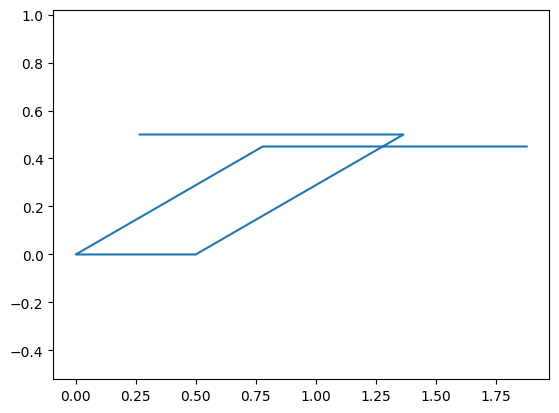

In [32]:
def plot_fourbar(state):
    state_dict = dict(zip([q1,q2,q3,q4,q5],state))
    points_state = points_design.subs(state_dict)
    points_state = numpy.array(points_state,dtype= float)
    plt.plot(points_state[:,0],points_state[:,1])
    plt.axis('equal')
plot_fourbar(ini)

In [33]:
result = so.minimize(objective_function,ini,method="powell")
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.135947794912955e-12
       x: [-1.788e-13 -4.890e-01  2.640e+00  5.236e-01 -1.514e+00]
     nit: 22
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 1.128e-09 -4.126e-01 ... -3.172e-02 -3.287e-01]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 4.238e-09  2.472e-02 ...  1.185e-02 -1.450e-02]]
    nfev: 2512

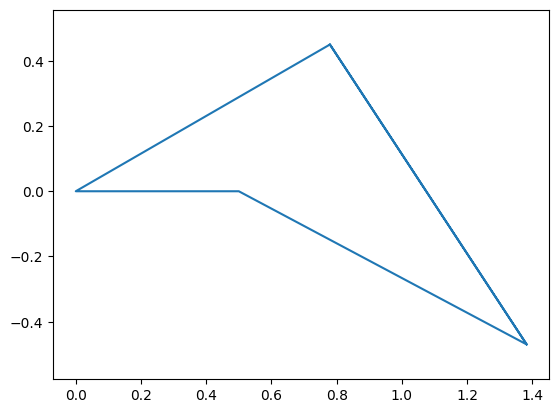

In [34]:
plot_fourbar(result.x)

In [35]:
zero = zero[:4,:]
zero

Matrix([
[l_1*cos(\theta_1) + l_2*cos(\theta_1 + \theta_2) - l_3*cos(\theta_1 + \theta_4 + \theta_5) - l_4*cos(\theta_1 + \theta_4)],
[l_1*sin(\theta_1) + l_2*sin(\theta_1 + \theta_2) - l_3*sin(\theta_1 + \theta_4 + \theta_5) - l_4*sin(\theta_1 + \theta_4)],
[                                                                                                                 \theta_1],
[                                                              l_3**2*(cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1)]])

In [36]:
independent = sympy.Matrix([q4])
dependent = sympy.Matrix([q1,q2,q3,q5])
zero_design = zero.subs(design)
zero_design

Matrix([
[0.5*cos(\theta_1) + cos(\theta_1 + \theta_2) - 0.9*cos(\theta_1 + \theta_4) - 1.1*cos(\theta_1 + \theta_4 + \theta_5)],
[0.5*sin(\theta_1) + sin(\theta_1 + \theta_2) - 0.9*sin(\theta_1 + \theta_4) - 1.1*sin(\theta_1 + \theta_4 + \theta_5)],
[                                                                                                             \theta_1],
[                                                           1.21*cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1.21]])

In [37]:
A = zero_design.jacobian(independent)
B = zero_design.jacobian(dependent)

In [38]:
state_dict = dict(zip([q1,q2,q3,q4,q5],result.x))
state_dict

{\theta_1: np.float64(-1.7880964035328403e-13),
 \theta_2: np.float64(-0.4890043362780645),
 \theta_3: np.float64(2.640400501087823),
 \theta_4: np.float64(0.5235987756028698),
 \theta_5: np.float64(-1.5137952593685409)}

In [39]:
An = numpy.array(A.subs(state_dict),dtype=float)
An

array([[-4.69747148e-01],
       [-1.38280101e+00],
       [ 0.00000000e+00],
       [ 6.06738009e-09]])

In [40]:
Bn = numpy.array(B.subs(state_dict),dtype=float)
Bn.shape

(4, 4)

In [41]:
Cn = -numpy.linalg.inv(Bn)@An
Cn

array([[ 0.        ],
       [ 1.87011814],
       [-0.42571827],
       [ 0.44439987]])

In [42]:
p_out = p4+.5*v5_in_n
p_out.simplify()
p_out

Matrix([
[0.5*l_3*cos(\theta_1 + \theta_4 + \theta_5) + 1.0*l_4*cos(\theta_1 + \theta_4)],
[0.5*l_3*sin(\theta_1 + \theta_4 + \theta_5) + 1.0*l_4*sin(\theta_1 + \theta_4)],
[                                                                             0]])

In [43]:
p_out_n = p_out.subs(design).subs(state_dict)
p_out_n

Matrix([
[     1.0811119348563],
[-0.00987357410826606],
[                   0]])

In [44]:
D = p_out.jacobian(independent)
D

Matrix([
[-0.5*l_3*sin(\theta_1 + \theta_4 + \theta_5) - 1.0*l_4*sin(\theta_1 + \theta_4)],
[ 0.5*l_3*cos(\theta_1 + \theta_4 + \theta_5) + 1.0*l_4*cos(\theta_1 + \theta_4)],
[                                                                              0]])

In [45]:
E = p_out.jacobian(dependent)

Dn = numpy.array(D.subs(design).subs(state_dict),dtype=float)
En = numpy.array(E.subs(design).subs(state_dict),dtype=float)
Jo = (Dn+En@Cn)
Jo

array([[0.21424133],
       [1.21518252],
       [0.        ]])

In [46]:
dy = Jo@numpy.array([[1]])
dy

array([[0.21424133],
       [1.21518252],
       [0.        ]])

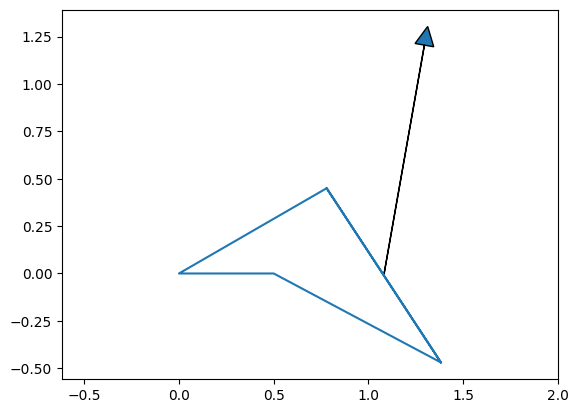

In [47]:
plot_fourbar(result.x)
plt.arrow(p_out_n[0,0],p_out_n[1,0],dy[0,0],dy[1,0],shape='full',head_width=.1,head_length=.1)